In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%pip install matplotlib

In [4]:
import pandas as pd
df = pd.read_csv('simplified_coffee.csv')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB
None


In [8]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []

# Ensure we do not exceed the number of rows in the dataset
num_reviews = min(1000, len(df))

for i in range(num_reviews):
    try:
        # Access the 'text' column in the ith row
        review = re.sub('[^a-zA-Z]', ' ', df['review'].iloc[i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    except KeyError as e:
        print(f"KeyError: {e} at index {i}")
    except Exception as e:
        print(f"Unexpected error: {e} at index {i}")

print(corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['crispli sweet cocoa tone lemon blossom roast cacao nib date rice candi white peppercorn aroma cup savori tart structur delic silki mouthfeel richli dri finish lead cocoa tone crispli sweet floral note short hint spice white peppercorn long', 'delic sweetli spice tone pink peppercorn date myrrh lavend roast cacao nib aroma cup crisp spice tone structur citru like acid satini smooth mouthfeel crispli sweet finish center around spice pungent floral note', 'deepli sweet subtli pungent honey pear tangerin zest dark chocol pistachio aroma cup sweet juici yet crisp structur think ripe pear plush buoyant mouthfeel reson flavor satur short finish simplifi around hint tangerin pistachio long', 'delic richli sweetli tart dri hibiscu fine musk almond sandalwood raspberri aroma cup fruit tone deepli sweet structur gentli express acid buoyant satini smooth mouthfeel crisp flavor satur finish character sweet tart fruit floral tone raspberri hibiscu', 'high tone floral dri apricot magnolia almond bu

In [12]:
from gensim import corpora, models
import gensim

# Tokenize your cleaned text (assuming it's stored in the 'clean_text' column)
tokenized_text = [text.split() for text in corpus]

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(tokenized_text)

# Filter out tokens that appear in less than 10 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the documents into a bag-of-words corpus.
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Train the LDA model.
lda_model = gensim.models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print the topics.
for idx, topic in lda_model.print_topics():
    print("Topic {}: {}".format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.101*"chocol" + 0.068*"dark" + 0.027*"cedar" + 0.026*"fruit" + 0.022*"richli" + 0.021*"flower" + 0.020*"tart" + 0.017*"sweetli" + 0.017*"chocolati" + 0.017*"like"
Topic 1: 0.043*"savori" + 0.034*"cocoa" + 0.031*"nib" + 0.028*"richli" + 0.027*"syrupi" + 0.023*"currant" + 0.022*"long" + 0.022*"honey" + 0.022*"juici" + 0.021*"tart"
Topic 2: 0.068*"cocoa" + 0.052*"nib" + 0.049*"tart" + 0.027*"zest" + 0.027*"delic" + 0.027*"bright" + 0.027*"juici" + 0.022*"floral" + 0.022*"lemon" + 0.021*"sweetli"
Topic 3: 0.053*"rose" + 0.035*"tea" + 0.032*"coconut" + 0.031*"savori" + 0.028*"floral" + 0.024*"toffe" + 0.018*"richli" + 0.017*"roast" + 0.015*"tart" + 0.015*"nib"
Topic 4: 0.049*"chocol" + 0.046*"caramel" + 0.040*"bake" + 0.034*"nut" + 0.030*"zest" + 0.028*"spice" + 0.025*"smooth" + 0.022*"oak" + 0.020*"dri" + 0.019*"savori"
Topic 5: 0.035*"flower" + 0.034*"fresh" + 0.031*"like" + 0.029*"freesia" + 0.024*"tart" + 0.024*"sugar" + 0.022*"spice" + 0.021*"tobacco" + 0.021*"zest" + 0.021*"

In [13]:
!pip install pyLDAvis

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
import string
from nltk.corpus import stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_no_newline = Test_punc_removed_join.replace('\n', ' ')
    Test_no_stopwords = [word for word in Test_no_newline.split() if word.lower() not in stopwords.words('english')]
    return Test_no_stopwords

data_clean = df['review'].apply(message_cleaning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
data_clean.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count                                                  1246
unique                                                 1246
top       [Crisply, sweet, cocoatoned, Lemon, blossom, r...
freq                                                      1
Name: review, dtype: object

In [17]:
from collections import Counter
import itertools

# Flatten the list of lists into a single list
flat_data_clean = list(itertools.chain.from_iterable(data_clean))

# Perform frequency analysis
word_freq = Counter(flat_data_clean)

# Print the most common words and their frequencies
print("Most common words and their frequencies:")
for word, freq in word_freq.most_common(25):
    print(f"{word}: {freq}")


Most common words and their frequencies:
cup: 1291
aroma: 1247
mouthfeel: 1212
finish: 1186
structure: 1053
acidity: 1025
chocolate: 841
notes: 683
sweet: 623
cocoa: 481
nib: 452
cedar: 429
zest: 391
syrupy: 362
juicy: 332
tart: 326
almond: 323
dark: 313
long: 299
Sweetly: 285
richly: 277
full: 275
Richly: 259
flowers: 254
bright: 252


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


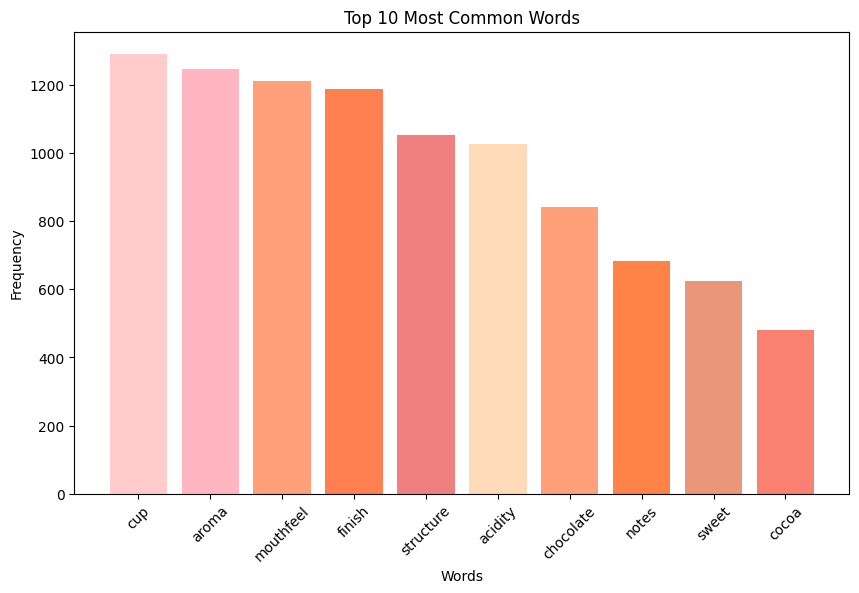

In [18]:
import matplotlib.pyplot as plt

# Define a different pastel color palette
pastel_colors = ['#FFCCCB', '#FFB6C1', '#FFA07A', '#FF7F50', '#F08080',
                 '#FFDAB9', '#FFA07A', '#FF8247', '#E9967A', '#FA8072']

# Get the top 10 most common words and their frequencies
top_10_words = word_freq.most_common(10)

# Separate the words and frequencies
words = [word[0] for word in top_10_words]
frequencies = [word[1] for word in top_10_words]

# Plot the top 10 words and their frequencies using the new pastel colors
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color=pastel_colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()
